## Import library

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read data

In [56]:
# Path_art = 'BBC News Summary/News Articles'
# Path_sum = 'BBC News Summary/Summaries'
# Path_art_cat = []
# Path_sum_cat = []

# dir_list = os.listdir(Path_art)
# for dir in dir_list:
#     Path_art_cat.append(Path_art+'/'+dir)

# dir_list = os.listdir(Path_sum)
# for dir in dir_list:
#     Path_sum_cat.append(Path_sum+'/'+dir)

In [45]:
df = pd.read_csv("BBC_News_Summary.csv")
df.head()

,Unnamed: 0,articles,summaries,categories
0,0,Escaped prisoner report ordered\r\n\r\nFirst M...,He held each of the major offices of chancello...,politics
1,1,Hospital suspends 'no Welsh' plan\r\n\r\nAn En...,Tony Blair is likely to name 5 May as election...,politics
2,2,'No-one can define new hunt ban'\r\n\r\nThe ne...,Tory co-chairman Liam Fox has opened proceedin...,politics
3,3,Police urge pub closure power\r\n\r\nNew power...,Labour election coordinator Alan Milburn claim...,politics
4,4,Blunkett tells of love and pain\r\n\r\nDavid B...,"In a statement, he said abortion was a ""very k...",politics


## Remove '\r\n'

In [46]:
df = df.replace(r'\r\n\r\n',' ', regex=True)
df.head()

,Unnamed: 0,articles,summaries,categories
0,0,Escaped prisoner report ordered First Minister...,He held each of the major offices of chancello...,politics
1,1,Hospital suspends 'no Welsh' plan An English h...,Tony Blair is likely to name 5 May as election...,politics
2,2,'No-one can define new hunt ban' The new law b...,Tory co-chairman Liam Fox has opened proceedin...,politics
3,3,Police urge pub closure power New powers are n...,Labour election coordinator Alan Milburn claim...,politics
4,4,Blunkett tells of love and pain David Blunkett...,"In a statement, he said abortion was a ""very k...",politics


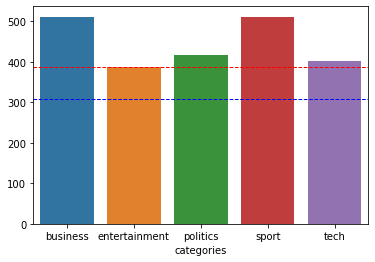

In [47]:
plt.figure(figsize=(6,4))

category_sizes = df.groupby('categories').size()
sns.barplot(x=category_sizes.index, y= category_sizes)
min_val = category_sizes.min()
plt.axhline(y=min_val,color='red',ls='--', lw=1)
plt.axhline(y=int(min_val*0.8),color='blue',ls='--', lw=1)
plt.show()

In [48]:
#-- get length of each article and summary for analysis
df['articles_length'] = df['articles'].apply(lambda x : len(x.split()))
df['summaries_length'] = df['summaries'].apply(lambda x : len(x.split()))

In [49]:
category_length = df.groupby('categories',0).agg(
    {'articles_length':['mean', 'max'],'summaries_length':['mean', 'max']})
print(type(category_length))
category_length

<class 'pandas.core.frame.DataFrame'>


articles_length       summaries_length      
                         mean   max             mean   max
categories                                                
business           328.880392   891       139.929412   403
entertainment      330.621762  3482       144.049223  1706
politics           453.973621  4432       195.709832  2073
sport              329.262231  1662       143.187867   659
tech               502.695761  2969       213.837905  1430

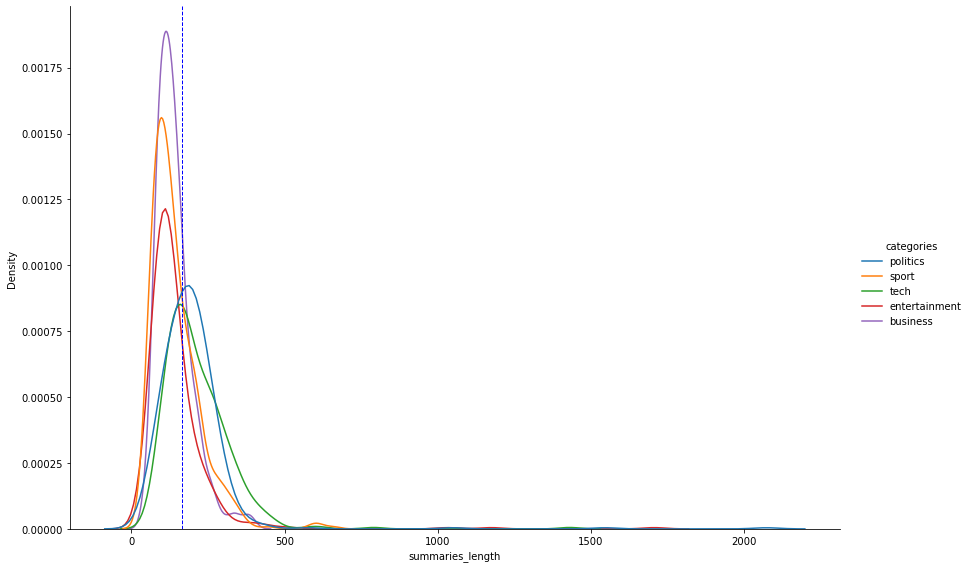

In [50]:
sns.displot(
    data = df, 
    x = 'summaries_length', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "categories",
    height = 8,
    aspect = 1.5
    )

plt.axvline(x=df.summaries_length.mean(),
            color='blue',
            ls='--', 
            lw=1)

In [51]:
df[df['summaries_length']==1706]

,Unnamed: 0,articles,summaries,categories,articles_length,summaries_length
1452,1452,Rap feud in 50 Cent's G-Unit crew US rap star ...,"Angels is a great song, but not the best song ...",entertainment,449,1706


In [39]:
df_filter = df[df['articles_length']<=512]
df_filter.head()

,Unnamed: 0,articles,summaries,categories,articles_length,summaries_length
1,1,Hospital suspends 'no Welsh' plan An English h...,Tony Blair is likely to name 5 May as election...,politics,461,126
2,2,'No-one can define new hunt ban' The new law b...,Tory co-chairman Liam Fox has opened proceedin...,politics,426,124
3,3,Police urge pub closure power New powers are n...,Labour election coordinator Alan Milburn claim...,politics,507,120
4,4,Blunkett tells of love and pain David Blunkett...,"In a statement, he said abortion was a ""very k...",politics,384,233
6,6,Tories pledge free sports lessons Children wou...,"But according to the BBC poll, 61% said the is...",politics,256,178


In [40]:
category_length = df_filter.groupby('categories',0).agg(
    {'articles_length':['mean', 'max'],'summaries_length':['mean', 'max']})
print(type(category_length))
category_length

<class 'pandas.core.frame.DataFrame'>


articles_length      summaries_length      
                         mean  max             mean   max
categories                                               
business           299.433761  505       139.405983   403
entertainment      275.052023  511       142.687861  1706
politics           361.431973  512       200.068027  2073
sport              277.400000  511       143.257778   659
tech               364.202429  511       214.663968  1430

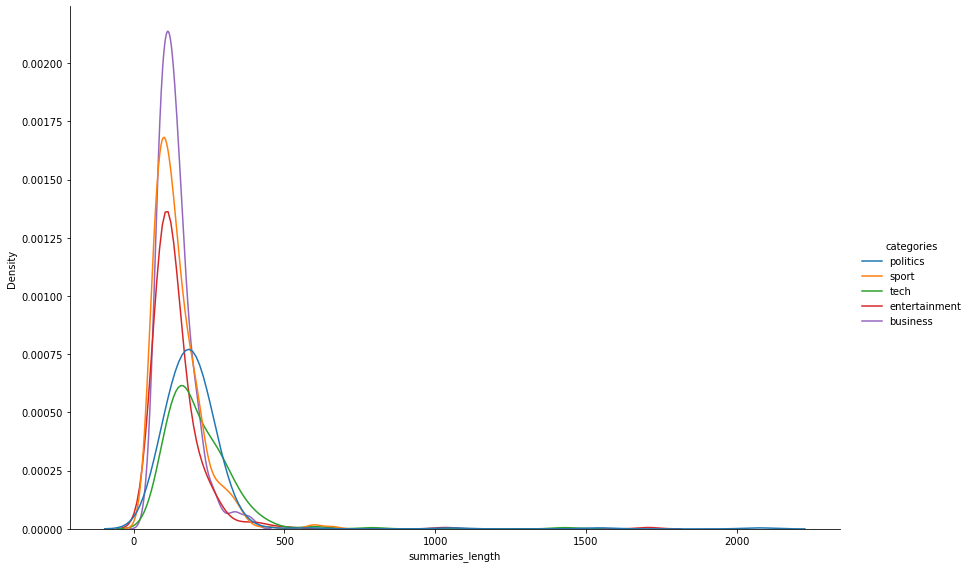

In [41]:
sns.displot(
    data = df_filter, 
    x = 'summaries_length', 
    kind = "kde", 
    color = 'darkblue', 
    hue = "categories",
    height = 8,
    aspect = 1.5
    )

In [42]:
df_filter[df_filter['summaries_length']==1706]

,Unnamed: 0,articles,summaries,categories,articles_length,summaries_length
1452,1452,Rap feud in 50 Cent's G-Unit crew US rap star ...,"Angels is a great song, but not the best song ...",entertainment,449,1706


,Unnamed: 0,articles,summaries,categories,articles_length,summaries_length
1452,1452,Rap feud in 50 Cent's G-Unit crew US rap star ...,"Angels is a great song, but not the best song ...",entertainment,449,1706
